In [5]:
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 653.6 kB/s eta 0:00:05
     -- ------------------------------------- 0.2/3.0 MB 2.0 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB 2.8 MB/s eta 0:00:01
     -------- ------------------------------- 0.7/3.0 MB 3.4 MB/s eta 0:00:01
     ----------- ---------------------------- 0.9/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------- ----------------------- 1.3/3.0 MB 4.5 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 4.8 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 4.9 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 5.6 MB/s eta 0:00:01
     ------------------------------------- -- 2.8/3.0 MB 6.0 MB/s eta 0:00:01
     -

1.Fetch Data using yFinance

In [6]:
import yfinance as yf

# Fetch 5 years of Apple stock data
data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
data = data[['Close']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2018-01-02,40.426815
2018-01-03,40.419777
2018-01-04,40.607533
2018-01-05,41.069859
2018-01-08,40.917313


2.Normalize and Prepare data

In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequence
def create_sequence(data, window_size=60):
    x,y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(x), np.array(y)

x,y = create_sequence(scaled_data)

In [9]:
# Split into training and testing
split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

3.Build LSTM Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

d:\Users\Shreyas Meru\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

4.Train and Validate the Model

In [14]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Save the Model
model.save("model_weights.h5")

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0454 - val_loss: 0.0023
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.

5.Plot Predictions vs Actual

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


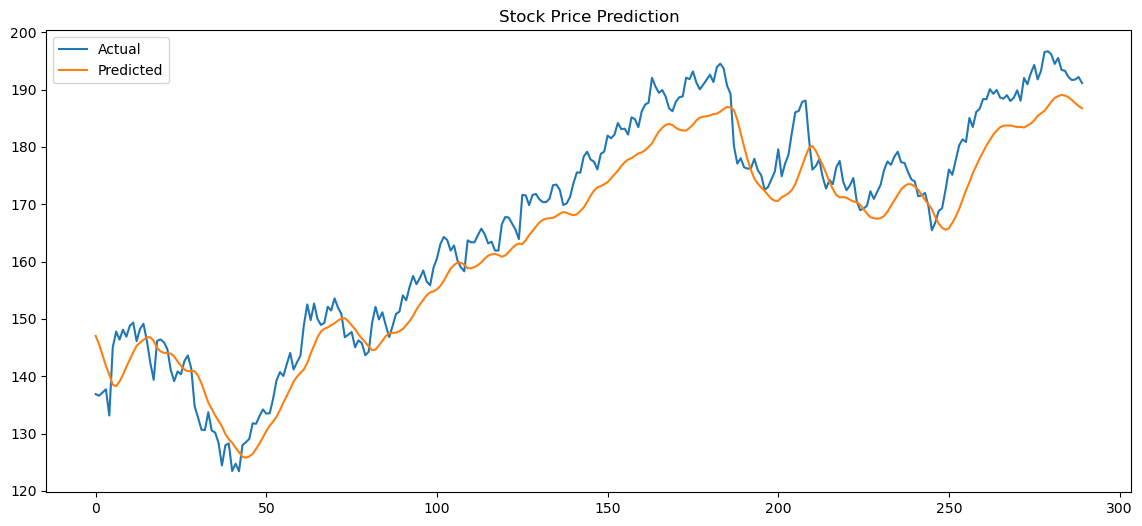

In [16]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()
